UTS: EDA & Pra-pemrosesan dengan Dask + GCS (Google Colab)

In [3]:
# -----------------------
# 0) Identitas Mahasiswa
# -----------------------
NAMA = "Firman Ramadhani"
NIM  = "202110370311136"

In [4]:
print("NAMA :", NAMA)
print("NIM  :", NIM)

NAMA : Firman Ramadhani
NIM  : 202110370311136


In [5]:
# 1) Install dependencies
!pip install -q gcsfs "dask[complete]" --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.0/201.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rapids-dask-dependency 25.6.0 requires dask==2025.5.0, but you have dask 2025.11.0 which is incompatible.
rapids-dask-dependency 25.6.0 requires distributed==2025.5.0, but you have distributed 2025.11.0 which is incompatible.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.10.0 which is incompatible.


In [6]:
# 2) Import dan mulai Dask
from dask.distributed import Client, LocalCluster
import dask.dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Inisialisasi LocalCluster (2 worker, memory limit 4GiB per worker)
cluster = LocalCluster(n_workers=2, memory_limit='4GiB', threads_per_worker=1)
client = Client(cluster)
print(f"Dask dashboard: {client.dashboard_link}")

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44541
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35989'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33673'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:32993 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:32993
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35770
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:33979 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33979
INFO:distributed.core:Starting established connection to tcp://127

Dask dashboard: http://127.0.0.1:8787/status


In [9]:
# 3) Baca data dari GCS (public bucket) secara anonim

gcs_path = "gcs://quansight-datasets/airline-ontime-performance/csv/*ber_2020.csv"
dtype_hints = {
    'CANCELLATION_CODE': 'object',
    'DIV1_AIRPORT': 'object',
    'DIV1_TAIL_NUM': 'object',
    'DIV2_AIRPORT': 'object',
    'DIV2_TAIL_NUM': 'object'
}

print("Membaca CSV dari GCS (token 'anon') ... (akan berjalan lazy hingga compute dipanggil)")
df = dd.read_csv(
    gcs_path,
    assume_missing=True,
    storage_options={'token': 'anon'},
    dtype=dtype_hints,
    low_memory=False
)


Membaca CSV dari GCS (token 'anon') ... (akan berjalan lazy hingga compute dipanggil)


In [10]:
# Tampilkan info dasar (head, jumlah partisi)
print("\n--- Preview data (beberapa baris pertama) ---")
display(df.head(5))


--- Preview data (beberapa baris pertama) ---


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
0,2020.0,4.0,12.0,1.0,2.0,12/1/2020 12:00:00 AM,9E,20363.0,9E,N131EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,4.0,12.0,1.0,2.0,12/1/2020 12:00:00 AM,9E,20363.0,9E,N131EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,4.0,12.0,1.0,2.0,12/1/2020 12:00:00 AM,9E,20363.0,9E,N131EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,4.0,12.0,1.0,2.0,12/1/2020 12:00:00 AM,9E,20363.0,9E,N131EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,4.0,12.0,1.0,2.0,12/1/2020 12:00:00 AM,9E,20363.0,9E,N131EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print("Jumlah partisi Dask:", df.npartitions)
# Hitung jumlah baris total (efektif) dengan cara yang efisien:
total_rows = df.map_partitions(len).sum().compute()
print("Jumlah total baris (perkiraan akurat):", total_rows)

Jumlah partisi Dask: 7
Jumlah total baris (perkiraan akurat): 1411177


Bagian 2: EDA (Exploratory Data Analysis)

In [12]:
# 1) Statistik deskriptif kolom numerik (compute)
print("\n--- Statistik deskriptif (kolom numerik) ---")
try:
    desc = df.describe().compute()
    display(desc)
except Exception as e:
    print("Gagal compute describe():", e)


--- Statistik deskriptif (kolom numerik) ---


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
count,1411177.0,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020.0,3.770867e+00,1.055538e+01,1.594778e+01,4.024031e+00,2.000502e+04,2.669464e+03,1.260339e+04,1.260343e+06,3.170161e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,4.202750e-01,1.109733e+00,8.790429e+00,2.013970e+00,3.808987e+02,1.845574e+03,1.548834e+03,1.548831e+05,1.348507e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.0,3.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013506e+06,3.007000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.0,3.000000e+00,9.000000e+00,9.000000e+00,3.000000e+00,1.979000e+04,1.213000e+03,1.129200e+04,1.129202e+06,3.055900e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.0,4.000000e+00,1.000000e+01,1.600000e+01,4.000000e+00,1.997700e+04,2.629000e+03,1.252300e+04,1.252306e+06,3.145300e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.0,4.000000e+00,1.100000e+01,2.400000e+01,6.000000e+00,2.037800e+04,4.629000e+03,1.405700e+04,1.405702e+06,3.257500e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.0,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.045200e+04,8.819000e+03,1.686900e+04,1.686901e+06,3.599100e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 1) Statistik deskriptif kolom numerik (compute)
print("\n--- Statistik deskriptif (kolom numerik) ---")
try:
    desc = df.describe().compute()
    display(desc)
except Exception as e:
    print("Gagal compute describe():", e)


--- Statistik deskriptif (kolom numerik) ---


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
count,1411177.0,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,1.411177e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020.0,3.770867e+00,1.055538e+01,1.594778e+01,4.024031e+00,2.000502e+04,2.669464e+03,1.260339e+04,1.260343e+06,3.170161e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,4.202750e-01,1.109733e+00,8.790429e+00,2.013970e+00,3.808987e+02,1.845574e+03,1.548834e+03,1.548831e+05,1.348507e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020.0,3.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013506e+06,3.007000e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.0,3.000000e+00,9.000000e+00,9.000000e+00,3.000000e+00,1.979000e+04,1.213000e+03,1.129200e+04,1.129202e+06,3.055900e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.0,4.000000e+00,1.000000e+01,1.600000e+01,4.000000e+00,1.997700e+04,2.629000e+03,1.252300e+04,1.252306e+06,3.145300e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2020.0,4.000000e+00,1.100000e+01,2.400000e+01,6.000000e+00,2.037800e+04,4.629000e+03,1.405700e+04,1.405702e+06,3.257500e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.0,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.045200e+04,8.819000e+03,1.686900e+04,1.686901e+06,3.599100e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# 2) Cek nilai unik teratas dari kolom ORIGIN jika ada
if 'ORIGIN' in df.columns:
    print("\n--- Top 10 ORIGIN ---")
    print(df['ORIGIN'].value_counts().compute().head(10))
else:
    print("\nKolom 'ORIGIN' tidak ditemukan di dataset.")


--- Top 10 ORIGIN ---


ORIGIN
ACV     305
ACY     487
AGS    1180
ALS     104
BKG      28
BRD     210
BRW     120
CAK     562
CHA    1701
CNY     230
Name: count, dtype: int64[pyarrow]


In [15]:
# 3) Cek persentase nilai kosong per kolom
print("\n--- Persentase nilai kosong (per kolom) ---")
null_counts = df.isnull().sum().compute()
null_percent = (null_counts / total_rows) * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
display(null_percent)


--- Persentase nilai kosong (per kolom) ---


,0
DIV4_WHEELS_OFF,100.000000
DIV4_LONGEST_GTIME,100.000000
DIV4_TOTAL_GTIME,100.000000
DIV4_WHEELS_ON,100.000000
DIV4_AIRPORT_SEQ_ID,100.000000
...,...
DEP_DEL15,0.657891
DEP_DELAY_GROUP,0.657891
DEP_TIME,0.657678
TAIL_NUM,0.162488


Bagian 3: Pra-pemrosesan

In [16]:
# 3.1 Pastikan kolom penting ada; jika tidak, beri peringatan.
required_cols = ['YEAR', 'DEP_DELAY', 'ARR_DELAY', 'OP_UNIQUE_CARRIER',
                 'DEP_TIME', 'ARR_TIME', 'DISTANCE']
for c in required_cols:
    if c not in df.columns:
        print(f"PERINGATAN: Kolom '{c}' tidak ditemukan. Beberapa fungsi mungkin tidak berjalan.")


In [17]:
# 3.2 Isi missing pada DEP_DELAY dengan nilai rata-rata (compute average dahulu)
if 'DEP_DELAY' in df.columns:
    dep_delay_mean = df['DEP_DELAY'].mean().compute()
    print(f"\nRata-rata DEP_DELAY (digunakan untuk fillna): {dep_delay_mean:.3f}")
    df['DEP_DELAY'] = df['DEP_DELAY'].fillna(dep_delay_mean)
else:
    print("\nKolom DEP_DELAY tidak ada; skip fillna.")



Rata-rata DEP_DELAY (digunakan untuk fillna): 0.807


In [18]:
# 3.3 Ubah YEAR menjadi int jika memungkinkan
if 'YEAR' in df.columns:
    try:
        df['YEAR'] = df['YEAR'].astype(int)
    except Exception:
        df['YEAR'] = dd.to_numeric(df['YEAR'], errors='coerce').astype('Int64')


In [19]:
# 3.4 Ubah object -> category untuk efisiensi memori (pilih kolom object)
for col in df.columns:
    if str(df[col].dtype) == 'object':
        # convert to categorical lazily
        try:
            df[col] = df[col].astype('category')
        except Exception:
            pass  # jika gagal, biarkan

In [21]:
# 3.5 Membuat FLIGHT_DURATION dari DEP_TIME & ARR_TIME
# NOTE: Perhatian: dataset sering merepresentasikan waktu sebagai HHMM (mis. 945 = 9:45).
# Kita konversi HHMM -> menit sejak tengah malam. Jika kolom time tidak ada atau tak terduga,
# kita beri fallback ke kolom CRS_ELAPSED_TIME bila tersedia.
def safe_prepare_times(dframe):
    # local pandas operations for each partition
    pdf = dframe.copy()
    # Convert to numeric (coerce non-numeric to NaN)
    for tcol in ['DEP_TIME', 'ARR_TIME']:
        if tcol in pdf.columns:
            pdf[tcol] = pd.to_numeric(pdf[tcol], errors='coerce')  # HHMM likely
    # Create minute columns if possible
    if 'DEP_TIME' in pdf.columns and 'ARR_TIME' in pdf.columns:
        # If values look like HHMM (>=0), compute minute-of-day
        pdf['DEP_TIME_MIN'] = np.floor(pdf['DEP_TIME'] / 100).fillna(0).astype(int) * 60 + (pdf['DEP_TIME'] % 100).fillna(0).astype(int)
        pdf['ARR_TIME_MIN'] = np.floor(pdf['ARR_TIME'] / 100).fillna(0).astype(int) * 60 + (pdf['ARR_TIME'] % 100).fillna(0).astype(int)
        # Duration naive
        pdf['FLIGHT_DURATION'] = pdf['ARR_TIME_MIN'] - pdf['DEP_TIME_MIN']
        # Jika negative (overnight), tambahkan 24*60
        mask_neg = pdf['FLIGHT_DURATION'] < 0
        if mask_neg.any():
            pdf.loc[mask_neg, 'FLIGHT_DURATION'] = pdf.loc[mask_neg, 'FLIGHT_DURATION'] + 24*60
    else:
        # fallback: gunakan CRS_ELAPSED_TIME atau actual elapsed if available
        elapsed_col = None
        for candidate in ['CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'ELAPSED_TIME']:
            if candidate in pdf.columns:
                elapsed_col = candidate
                break
        if elapsed_col:
            pdf['FLIGHT_DURATION'] = pd.to_numeric(pdf[elapsed_col], errors='coerce')
        else:
            pdf['FLIGHT_DURATION'] = np.nan
    return pdf

# Apply function using map_partitions (lazy until compute)
df = df.map_partitions(safe_prepare_times, meta=df._meta.assign(DEP_TIME_MIN='f8', ARR_TIME_MIN='f8', FLIGHT_DURATION='f8'))


# 3.6 FLIGHT_SPEED (bonus) will be created later if DISTANCE exists and duration >0


EDA Lanjutan & Jawaban Pertanyaan UTS

In [22]:
# Pertanyaan Konseptual
konseptual_answer = """
Dask digunakan karena dataset airline-ontime biasanya sangat besar (puluhan juta baris),
yang sulit atau tidak mungkin dimuat seluruhnya ke memori sekaligus dengan pandas.
Dask memecah dataset menjadi banyak partisi yang lebih kecil dan mengeksekusinya
secara paralel pada beberapa core/worker. Ini mengatasi keterbatasan memori (out-of-memory)
dan memanfaatkan paralelisme CPU sehingga operasi agregasi dan transformasi menjadi lebih cepat.
Selain itu Dask menyediakan API yang sangat mirip pandas sehingga migrasi kode relatif mudah.
"""
print("\n--- Jawaban Pertanyaan Konseptual ---")
print(konseptual_answer)


--- Jawaban Pertanyaan Konseptual ---

Dask digunakan karena dataset airline-ontime biasanya sangat besar (puluhan juta baris),
yang sulit atau tidak mungkin dimuat seluruhnya ke memori sekaligus dengan pandas.
Dask memecah dataset menjadi banyak partisi yang lebih kecil dan mengeksekusinya
secara paralel pada beberapa core/worker. Ini mengatasi keterbatasan memori (out-of-memory)
dan memanfaatkan paralelisme CPU sehingga operasi agregasi dan transformasi menjadi lebih cepat.
Selain itu Dask menyediakan API yang sangat mirip pandas sehingga migrasi kode relatif mudah.



In [23]:
# Pertanyaan 2: Rata-rata DEP_DELAY per maskapai (top 5 tertinggi)
print("\n--- Pertanyaan 2: Rata-rata DEP_DELAY per OP_UNIQUE_CARRIER (Top 5) ---")
if 'OP_UNIQUE_CARRIER' in df.columns and 'DEP_DELAY' in df.columns:
    avg_dep_delay = df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].mean().compute()
    top5_delay = avg_dep_delay.sort_values(ascending=False).head(5)
    print(top5_delay)
else:
    print("Kolom OP_UNIQUE_CARRIER atau DEP_DELAY tidak tersedia; tidak dapat menghitung.")



--- Pertanyaan 2: Rata-rata DEP_DELAY per OP_UNIQUE_CARRIER (Top 5) ---
OP_UNIQUE_CARRIER
G4    6.179768
YV    4.254156
OO    2.759895
AA    2.235839
NK    2.127225
Name: DEP_DELAY, dtype: float64


In [24]:
# Pertanyaan 3: FLIGHT_DURATION > 5 jam (300 menit) — jumlah total penerbangan
print("\n--- Pertanyaan 3: Hitung penerbangan durasi > 5 jam (300 menit) ---")
if 'FLIGHT_DURATION' in df.columns:
    long_flights = df[df['FLIGHT_DURATION'] > 300]
    num_long_flights = long_flights.map_partitions(len).sum().compute()
    print(f"Jumlah penerbangan dengan durasi lebih dari 5 jam: {num_long_flights}")
else:
    print("Kolom FLIGHT_DURATION tidak tersedia; tidak dapat menghitung.")



--- Pertanyaan 3: Hitung penerbangan durasi > 5 jam (300 menit) ---
Jumlah penerbangan dengan durasi lebih dari 5 jam: 91955


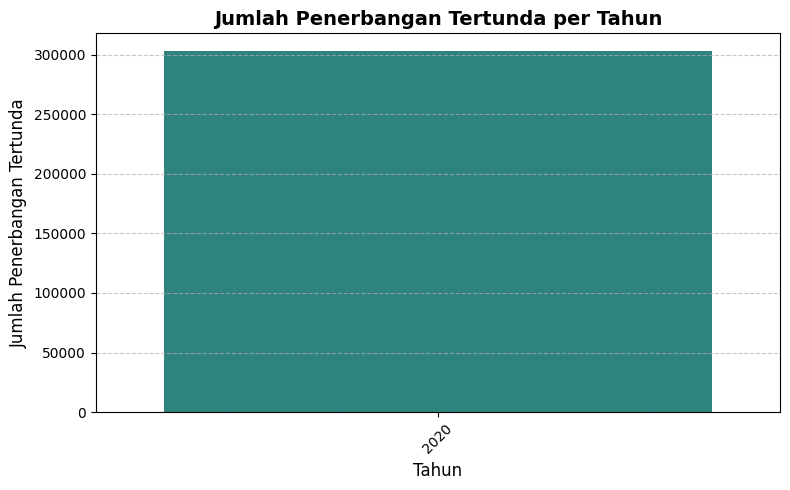

In [29]:
# =========================================================
# 📈 Visualisasi: Jumlah Penerbangan Tertunda per Tahun
# =========================================================

# Hitung jumlah penerbangan tertunda per tahun
delay_by_year = (
    df[df['ARR_DELAY'] > 0]
    .groupby('YEAR')
    .size()
    .compute()
)

# Plot hasil dengan visualisasi yang lebih menarik
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(
    x=delay_by_year.index,
    y=delay_by_year.values,
    palette='viridis'
)
plt.title('Jumlah Penerbangan Tertunda per Tahun', fontsize=14, fontweight='bold')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Penerbangan Tertunda', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
# Pertanyaan 5 (Bonus): FLIGHT_SPEED (miles per minute) & penerbangan tercepat
# ---------------------------
print("\n--- Pertanyaan Bonus: FLIGHT_SPEED dan penerbangan dengan speed tertinggi ---")
if 'DISTANCE' in df.columns and 'FLIGHT_DURATION' in df.columns:
    # Pastikan numeric
    df['DISTANCE'] = dd.to_numeric(df['DISTANCE'], errors='coerce')
    # Hindarkan pembagian 0
    df['FLIGHT_SPEED'] = df['DISTANCE'] / df['FLIGHT_DURATION']
    # Ambil top 1 (kecepatan tertinggi) — gunakan nlargest if available, else sort_values
    try:
        fastest = df.nlargest(1, 'FLIGHT_SPEED')[['OP_UNIQUE_CARRIER', 'FLIGHT_SPEED', 'DISTANCE', 'FLIGHT_DURATION']].compute()
        print("Penerbangan dengan FLIGHT_SPEED tertinggi:")
        display(fastest)
    except Exception as e:
        # fallback
        tmp = df[['OP_UNIQUE_CARRIER', 'FLIGHT_SPEED', 'DISTANCE', 'FLIGHT_DURATION']].compute()
        tmp = tmp.replace([np.inf, -np.inf], np.nan).dropna(subset=['FLIGHT_SPEED'])
        if not tmp.empty:
            fastest_row = tmp.sort_values('FLIGHT_SPEED', ascending=False).head(1)
            print("Penerbangan dengan FLIGHT_SPEED tertinggi (fallback):")
            display(fastest_row)
        else:
            print("Tidak ada data valid untuk FLIGHT_SPEED.")
else:
    print("Kolom DISTANCE atau FLIGHT_DURATION tidak tersedia; tidak dapat menghitung FLIGHT_SPEED.")



--- Pertanyaan Bonus: FLIGHT_SPEED dan penerbangan dengan speed tertinggi ---
Penerbangan dengan FLIGHT_SPEED tertinggi (fallback):


,OP_UNIQUE_CARRIER,FLIGHT_SPEED,DISTANCE,FLIGHT_DURATION
312266,WN,843.0,843.0,1


In [27]:
# Tambahan kecil: Simpan ringkasan / sample ke CSV (opsional)
# Jika ingin menyimpan sample hasil ke file lokal Colab:
try:
    sample_out = df.head(1000, compute=True)  # ambil sample kecil
    sample_out.to_csv("sample_airline_uts_head1000.csv", index=False)
    print("\nSample 1000 baris disimpan ke file: sample_airline_uts_head1000.csv")
except Exception as e:
    print("Gagal menyimpan sample:", e)


Sample 1000 baris disimpan ke file: sample_airline_uts_head1000.csv


In [28]:
# Bagian 6: Tutup Klaster Dask
print("\nMenutup client dan cluster Dask...")
client.close()
cluster.close()
print("Selesai. Klaster ditutup.")

INFO:distributed.scheduler:Remove client Client-81fcb169-bbe0-11f0-8836-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:35796; closing.
INFO:distributed.scheduler:Remove client Client-81fcb169-bbe0-11f0-8836-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-81fcb169-bbe0-11f0-8836-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1762524377.0682662') (0, 1)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:35989'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33673'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:35770; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:32993 name: 0 (stimulus_id='handle-worker-cleanup-1762524377.0876226')
INFO:distr


Menutup client dan cluster Dask...


INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:33673' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:35989' closed.
INFO:distributed.scheduler:Closing scheduler. Reason: unknown
INFO:distributed.scheduler:Scheduler closing all comms


Selesai. Klaster ditutup.
